In [1]:
lfs=require 'lfs'
if string.find(lfs.currentdir(), 'visualization') then
    lfs.chdir('../')
end

In [5]:
require 'gnuplot'
require 'utils.MnistManager'
require 'models.CnnVae'
require 'optim'
require 'cunn'
require 'cudnn'
require 'image'
Plot = require 'itorch.Plot'
cmd = {h_size = 400, z_size = 2}

In [6]:
N = 50
data = MnistManager(50):cuda()
saved = torch.load('save/CnnVae.t7')
vae = saved.vae

# Image Reconstruction

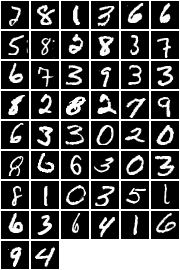

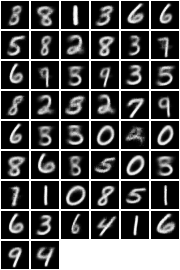

In [7]:
data:shuffle()
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
-- original image
itorch.image(input:reshape(N, 1, 28, 28))
-- reconstructed image
itorch.image(recon:reshape(N, 1, 28, 28))

# Encoding Distribution

In [8]:
data:shuffle(1000)
input = data:next()[1]
mulv, recon = unpack(vae.model:forward(input))
--     plt = Plot()
--     plt:circle(mu[{{},1}], mu[{{},2}], '#00F0F0')
--     plt:title("Distribution")
--     plt:draw()

In [9]:
plt = Plot()
mu = mulv[{{},1}]:clone():double()
plt:histogram(mu)
plt:title("hist")
plt:draw()

# Image Generation

In [36]:
Nr = 20
Nc = 6
b = torch.linspace(1,-1,Nr)
z = torch.Tensor(Nc,2)
z[{{},2}]:linspace(-1,1,Nc)
z = z:cuda()
for i = 1,Nr do
    z[{{},1}]:fill(b[i])
    recon = vae.decoder:forward(z)
    itorch.image(recon:reshape(Nc, 1, 28, 28))
end